# Phase-1 Baseline Analysis: WiFi Signal Spatial Mapping

This notebook demonstrates the baseline analysis pipeline.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use("seaborn-v0_8")
%matplotlib inline

In [7]:
# Load data
data_path = "../data/synthetic_wifi_data.json"
with open(data_path, "r") as f:
    data = json.load(f)
df = pd.DataFrame(data)
print(f"Loaded {len(df)} samples")

Loaded 200 samples


In [8]:
# Preprocessing
df_clean = df.dropna()
df_clean = df_clean[(df_clean["rssi"] >= -100) & (df_clean["rssi"] <= -30)]
print(f"After cleaning: {len(df_clean)} samples")

After cleaning: 200 samples


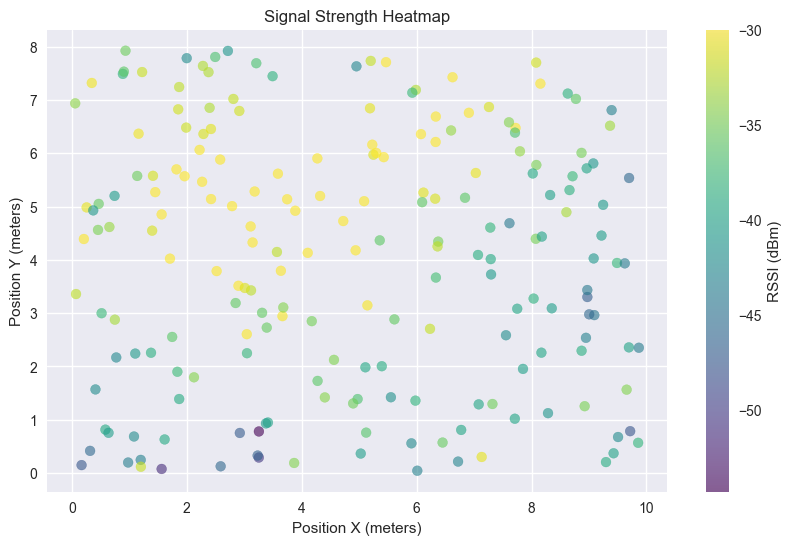

In [9]:
# Visualizations
plt.figure(figsize=(10, 6))
plt.scatter(df_clean["position_x"], df_clean["position_y"], c=df_clean["rssi"], cmap="viridis", s=50, alpha=0.6)
plt.colorbar(label="RSSI (dBm)")
plt.xlabel("Position X (meters)")
plt.ylabel("Position Y (meters)")
plt.title("Signal Strength Heatmap")
plt.show()

In [10]:
# Train model
X = df_clean[["position_x", "position_y"]].values
y = df_clean["rssi"].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

R² Score: 0.3604
RMSE: 3.7698
